In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("vgchartz-2024.csv")

In [21]:
data.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [22]:
# Convert 'release_date' and 'last_update' to datetime format
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['last_update'] = pd.to_datetime(data['last_update'], errors='coerce')


In [23]:


# Check for missing values in the dataset
missing_values = data.isnull().sum()


missing_values


img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

### Handle missing values:

* For missing `sales data`, we will fill missing values with zeros.
* For missing `release_date`, we will drop those rows since the date is crucial for time-based analysis.
* For missing `developer` values, we will also drop those rows as developer information is important.
* We will drop the `critic_score` and `last_update` columns due to a large number of missing values.

In [7]:
# Fill missing sales data with zeros
data['total_sales'] = data['total_sales'].fillna(0)
data['na_sales'] = data['na_sales'].fillna(0)
data['jp_sales'] = data['jp_sales'].fillna(0)
data['pal_sales'] = data['pal_sales'].fillna(0)
data['other_sales'] = data['other_sales'].fillna(0)

# Recalculate total sales where necessary
data['total_sales'] = data.apply(
    lambda row: row['total_sales'] if row['total_sales'] != 0 else row['na_sales'] + row['jp_sales'] + row['pal_sales'] + row['other_sales'],
    axis=1
)

# Drop rows with missing release_date as it is crucial for time-based analysis
data = data.dropna(subset=['release_date'])

# Drop 'critic_score' and 'last_update' columns due to large number of missing values
data = data.drop(columns=['critic_score', 'last_update'])

# Drop rows with missing developer
data = data.dropna(subset=['developer'])

# Check the cleaned dataset structure and missing values again
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 56954 entries, 0 to 64014
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           56954 non-null  object        
 1   title         56954 non-null  object        
 2   console       56954 non-null  object        
 3   genre         56954 non-null  object        
 4   publisher     56954 non-null  object        
 5   developer     56954 non-null  object        
 6   total_sales   56954 non-null  float64       
 7   na_sales      56954 non-null  float64       
 8   jp_sales      56954 non-null  float64       
 9   pal_sales     56954 non-null  float64       
 10  other_sales   56954 non-null  float64       
 11  release_date  56954 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 5.6+ MB
None
img             0
title           0
console         0
genre           0
publisher       0
developer       0
total_sales 

### Check the cleaned dataset:

In [8]:
# Display the first few rows of the cleaned dataset
print(data.head())


                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  total_sales  na_sales  \
0     PS3   Action  Rockstar Games  Rockstar North        20.32      6.37   
1     PS4   Action  Rockstar Games  Rockstar North        19.39      6.06   
2     PS2   Action  Rockstar Games  Rockstar North        16.15      8.41   
3    X360   Action  Rockstar Games  Rockstar North        15.86      9.06   
4     PS4  Shooter      Activision        Treyarch        15.09      6.18   

   jp_sales  pal_sales  other_sales release_date  

In [9]:
# Extract year from release_date

data['release_year'] = data['release_date'].dt.year


In [10]:
# Group by year and calculate total sales for each year
yearly_sales = data.groupby('release_year')['total_sales'].sum().reset_index()


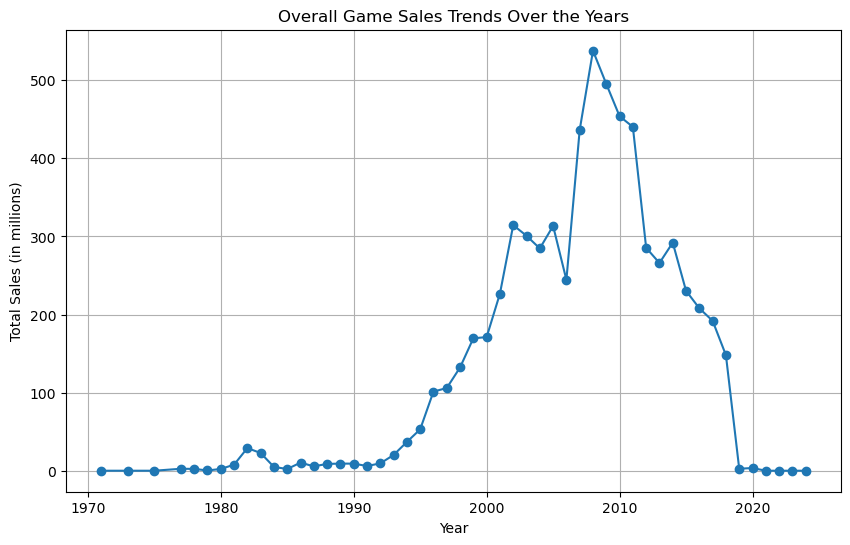

In [11]:
# Plot overall sales trends over the years

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['release_year'], yearly_sales['total_sales'], marker='o')
plt.title('Overall Game Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()


###  Platform Analysis

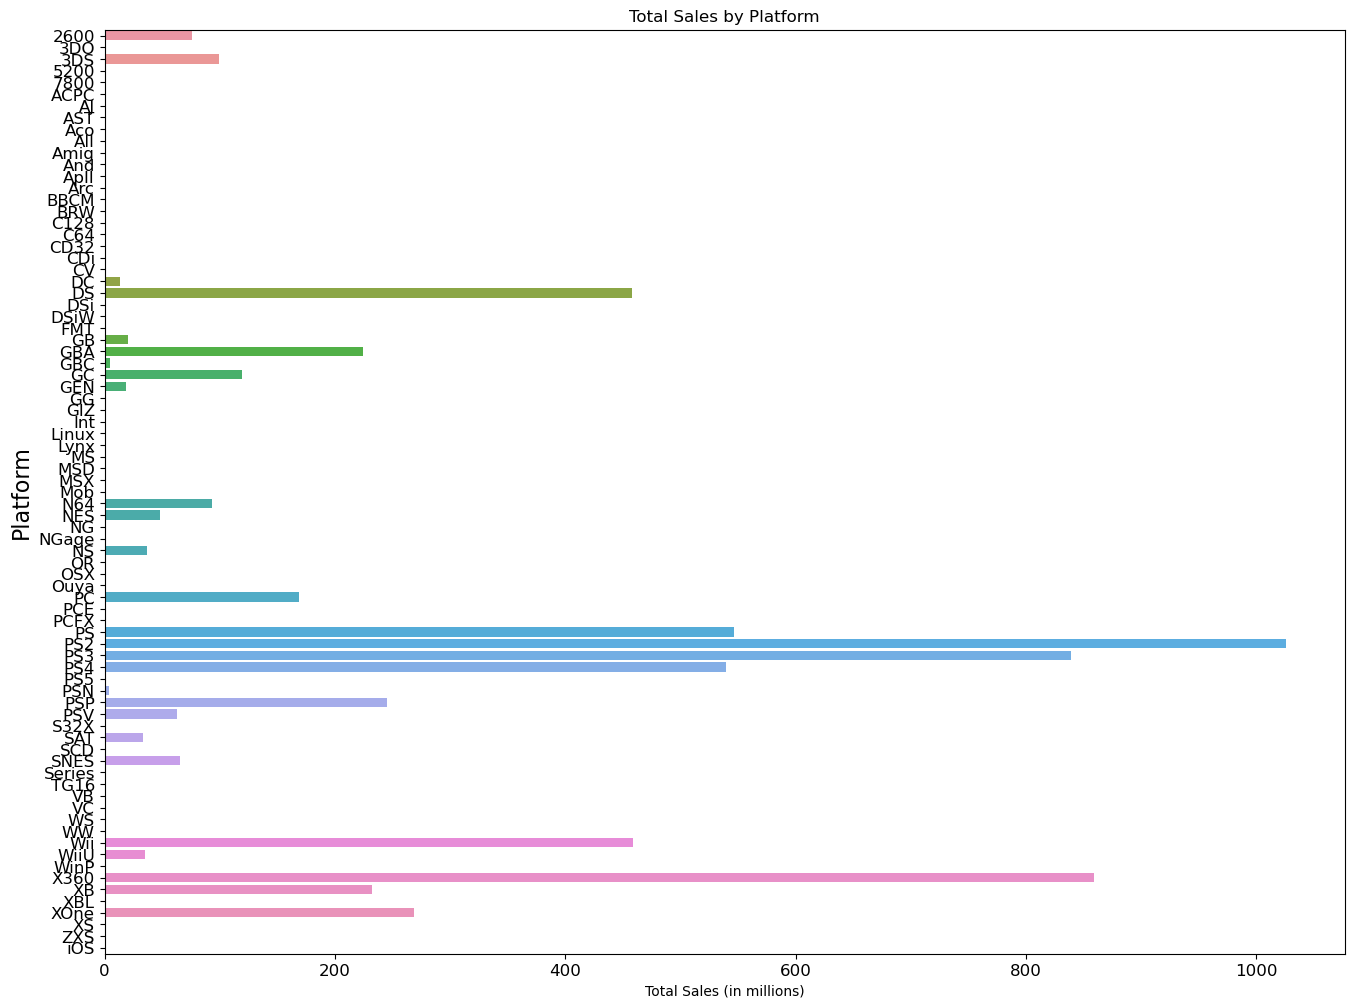

In [12]:

# Group by console and calculate total sales
platform_sales = data.groupby('console')['total_sales'].sum().reset_index()

# Plot sales by platform with improved visualization
plt.figure(figsize=(16, 12))
sns.barplot(data=platform_sales, x='total_sales', y='console')
plt.title('Total Sales by Platform')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Platform', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)# Rotate x-axis labels
plt.show()



### Publisher and Developer Analysis

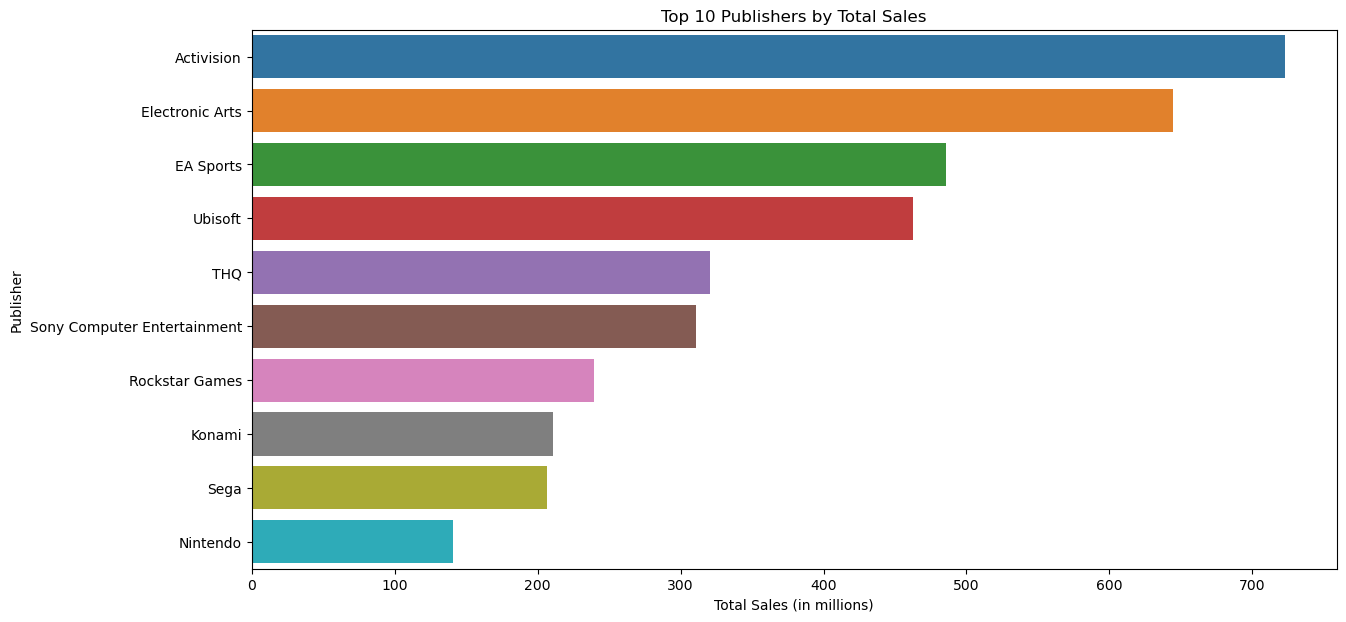

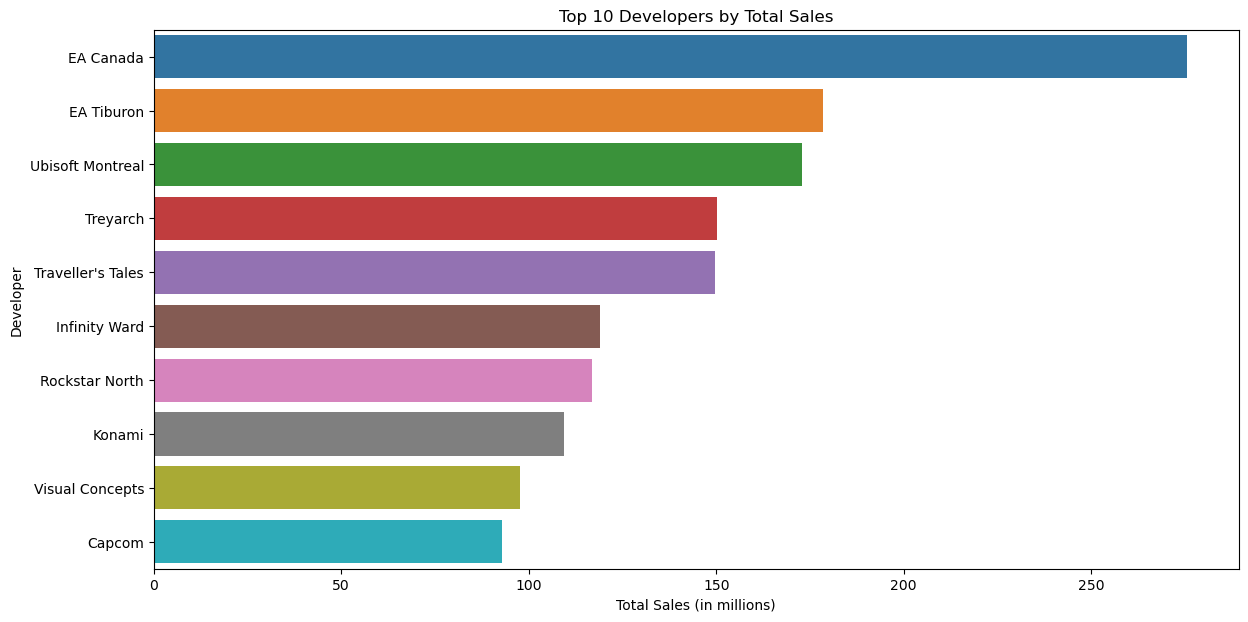

In [13]:
# Group by publisher and calculate total sales
publisher_sales = data.groupby('publisher')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

# Plot top 10 publishers by total sales
plt.figure(figsize=(14, 7))
sns.barplot(data=publisher_sales.head(10), x='total_sales', y='publisher')
plt.title('Top 10 Publishers by Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Publisher')
plt.show()

# Group by developer and calculate total sales
developer_sales = data.groupby('developer')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

# Plot top 10 developers by total sales
plt.figure(figsize=(14, 7))
sns.barplot(data=developer_sales.head(10), x='total_sales', y='developer')
plt.title('Top 10 Developers by Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Developer')
plt.show()


### Regional Analysis

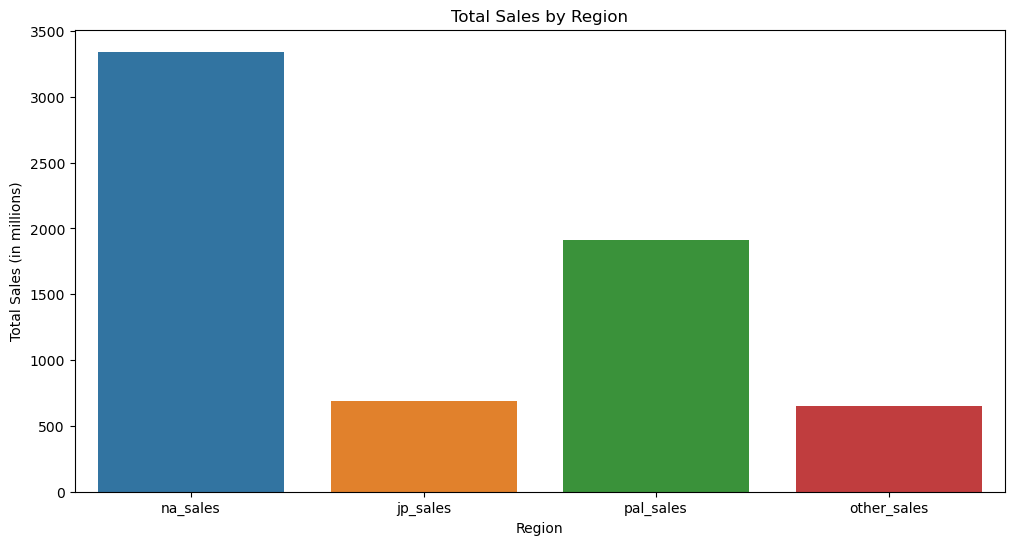

In [14]:
# Calculate total sales for each region
region_sales = data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().reset_index()
region_sales.columns = ['Region', 'Total_Sales']

# Plot sales by region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Region', y='Total_Sales')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.show()


### Top-Selling Games

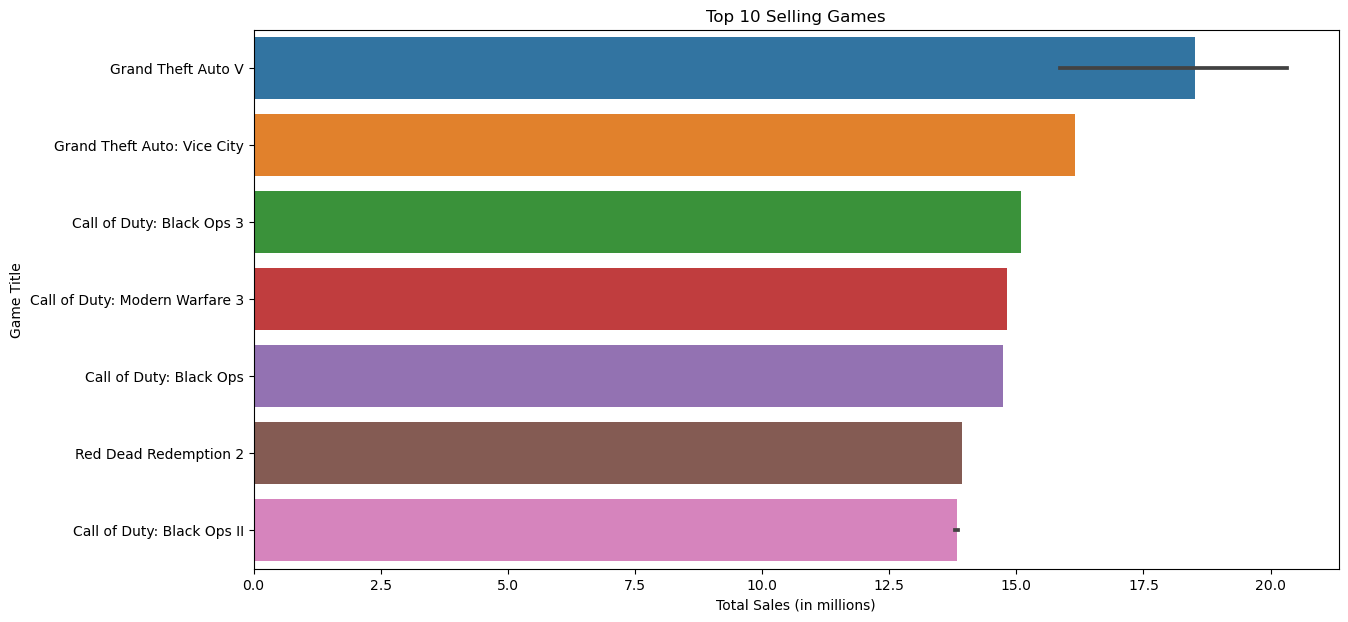

In [15]:
# Top 10 selling games overall
top_games = data[['title', 'total_sales']].sort_values(by='total_sales', ascending=False).head(10)

# Plot top 10 selling games
plt.figure(figsize=(14, 7))
sns.barplot(data=top_games, x='total_sales', y='title')
plt.title('Top 10 Selling Games')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Game Title')
plt.show()
